# LDAトピックモデルの作成

In [13]:
from gensim.corpora.dictionary import Dictionary
from gensim.models import LdaModel
from collections import defaultdict
from sklearn.model_selection import train_test_split
import pandas as pd

# カテゴリ数を取得する。
df = pd.read_csv('es_wakati.csv')
categories = df['業種(大分類)'].unique()
NUM_TOPICS = 6 #len(categories)

# 訓練データとtestデータに分ける
train_data, test_data = train_test_split(df, test_size=None, train_size=0.8, stratify=df['業種(大分類)'])

# 訓練データの整形
train_texts = []
train_sentenses = train_data['分かち書き'].values
for row in train_sentenses:
    train_texts.append(row.strip().split(' '))

# テストデータの整形
test_texts = []
test_sentenses = test_data['分かち書き'].values
for row in test_sentenses:
    test_texts.append(row.strip().split(' '))    
    
# テストデータの原文の整形
test_original_texts = []
test_original_sentenses = test_data[['業種(大分類)','文章']].values
test_original_sentenses_sen = test_data['文章'].values
test_original_sentenses_cat = test_data['業種(大分類)'].values

for row in test_original_sentenses:
    test_original_texts.append(row[0] + ',"' + row[1] + '"')

# 訓練データからモデル作成
dictionary = Dictionary(train_texts)
corpus = [dictionary.doc2bow(text) for text in train_texts]
lda_model = LdaModel(corpus=corpus, num_topics=NUM_TOPICS, id2word=dictionary)

# テストデータをモデルに掛ける
score_by_topic = defaultdict(int)
test_corpus = [dictionary.doc2bow(text) for text in test_texts]

# クラスタリング結果を出力
with open('lda_result.csv', 'w') as f:
    for unseen_doc, raw_train_text in zip(test_corpus, test_original_texts):
        f.write(raw_train_text + ',')
        for topic, score in lda_model[unseen_doc]:
            score_by_topic[int(topic)] = float(score)
        for i in range(NUM_TOPICS):
            f.write('{:.2f}'.format(score_by_topic[i]) + ',')
        f.write('\n')

In [14]:
from sklearn.model_selection import train_test_split
import pandas as pd

df = pd.read_csv('lda_result.csv')
df.head(2)

,建設業,鉄骨梁上（高さ３ｍ）の仮設足場において圧接作業中、足を滑らせ墜落した。,0.00,0.00.1,0.00.2,0.00.3,0.95,0.00.4,Unnamed: 8
0,建設業,立体駐車場建設現場の2階フロアで床材(900×1800×50mm重量40kg)を敷く作業中に...,0.16,0.00,0.05,0.11,0.67,0.0,NaN
1,建設業,工場の屋根上において、雨漏り補修工事で被災者が天窓の取り替え作業中、古い天窓を引き抜こうとし...,0.24,0.44,0.05,0.11,0.32,0.0,NaN


# LDAトピックモデルのWordCloud

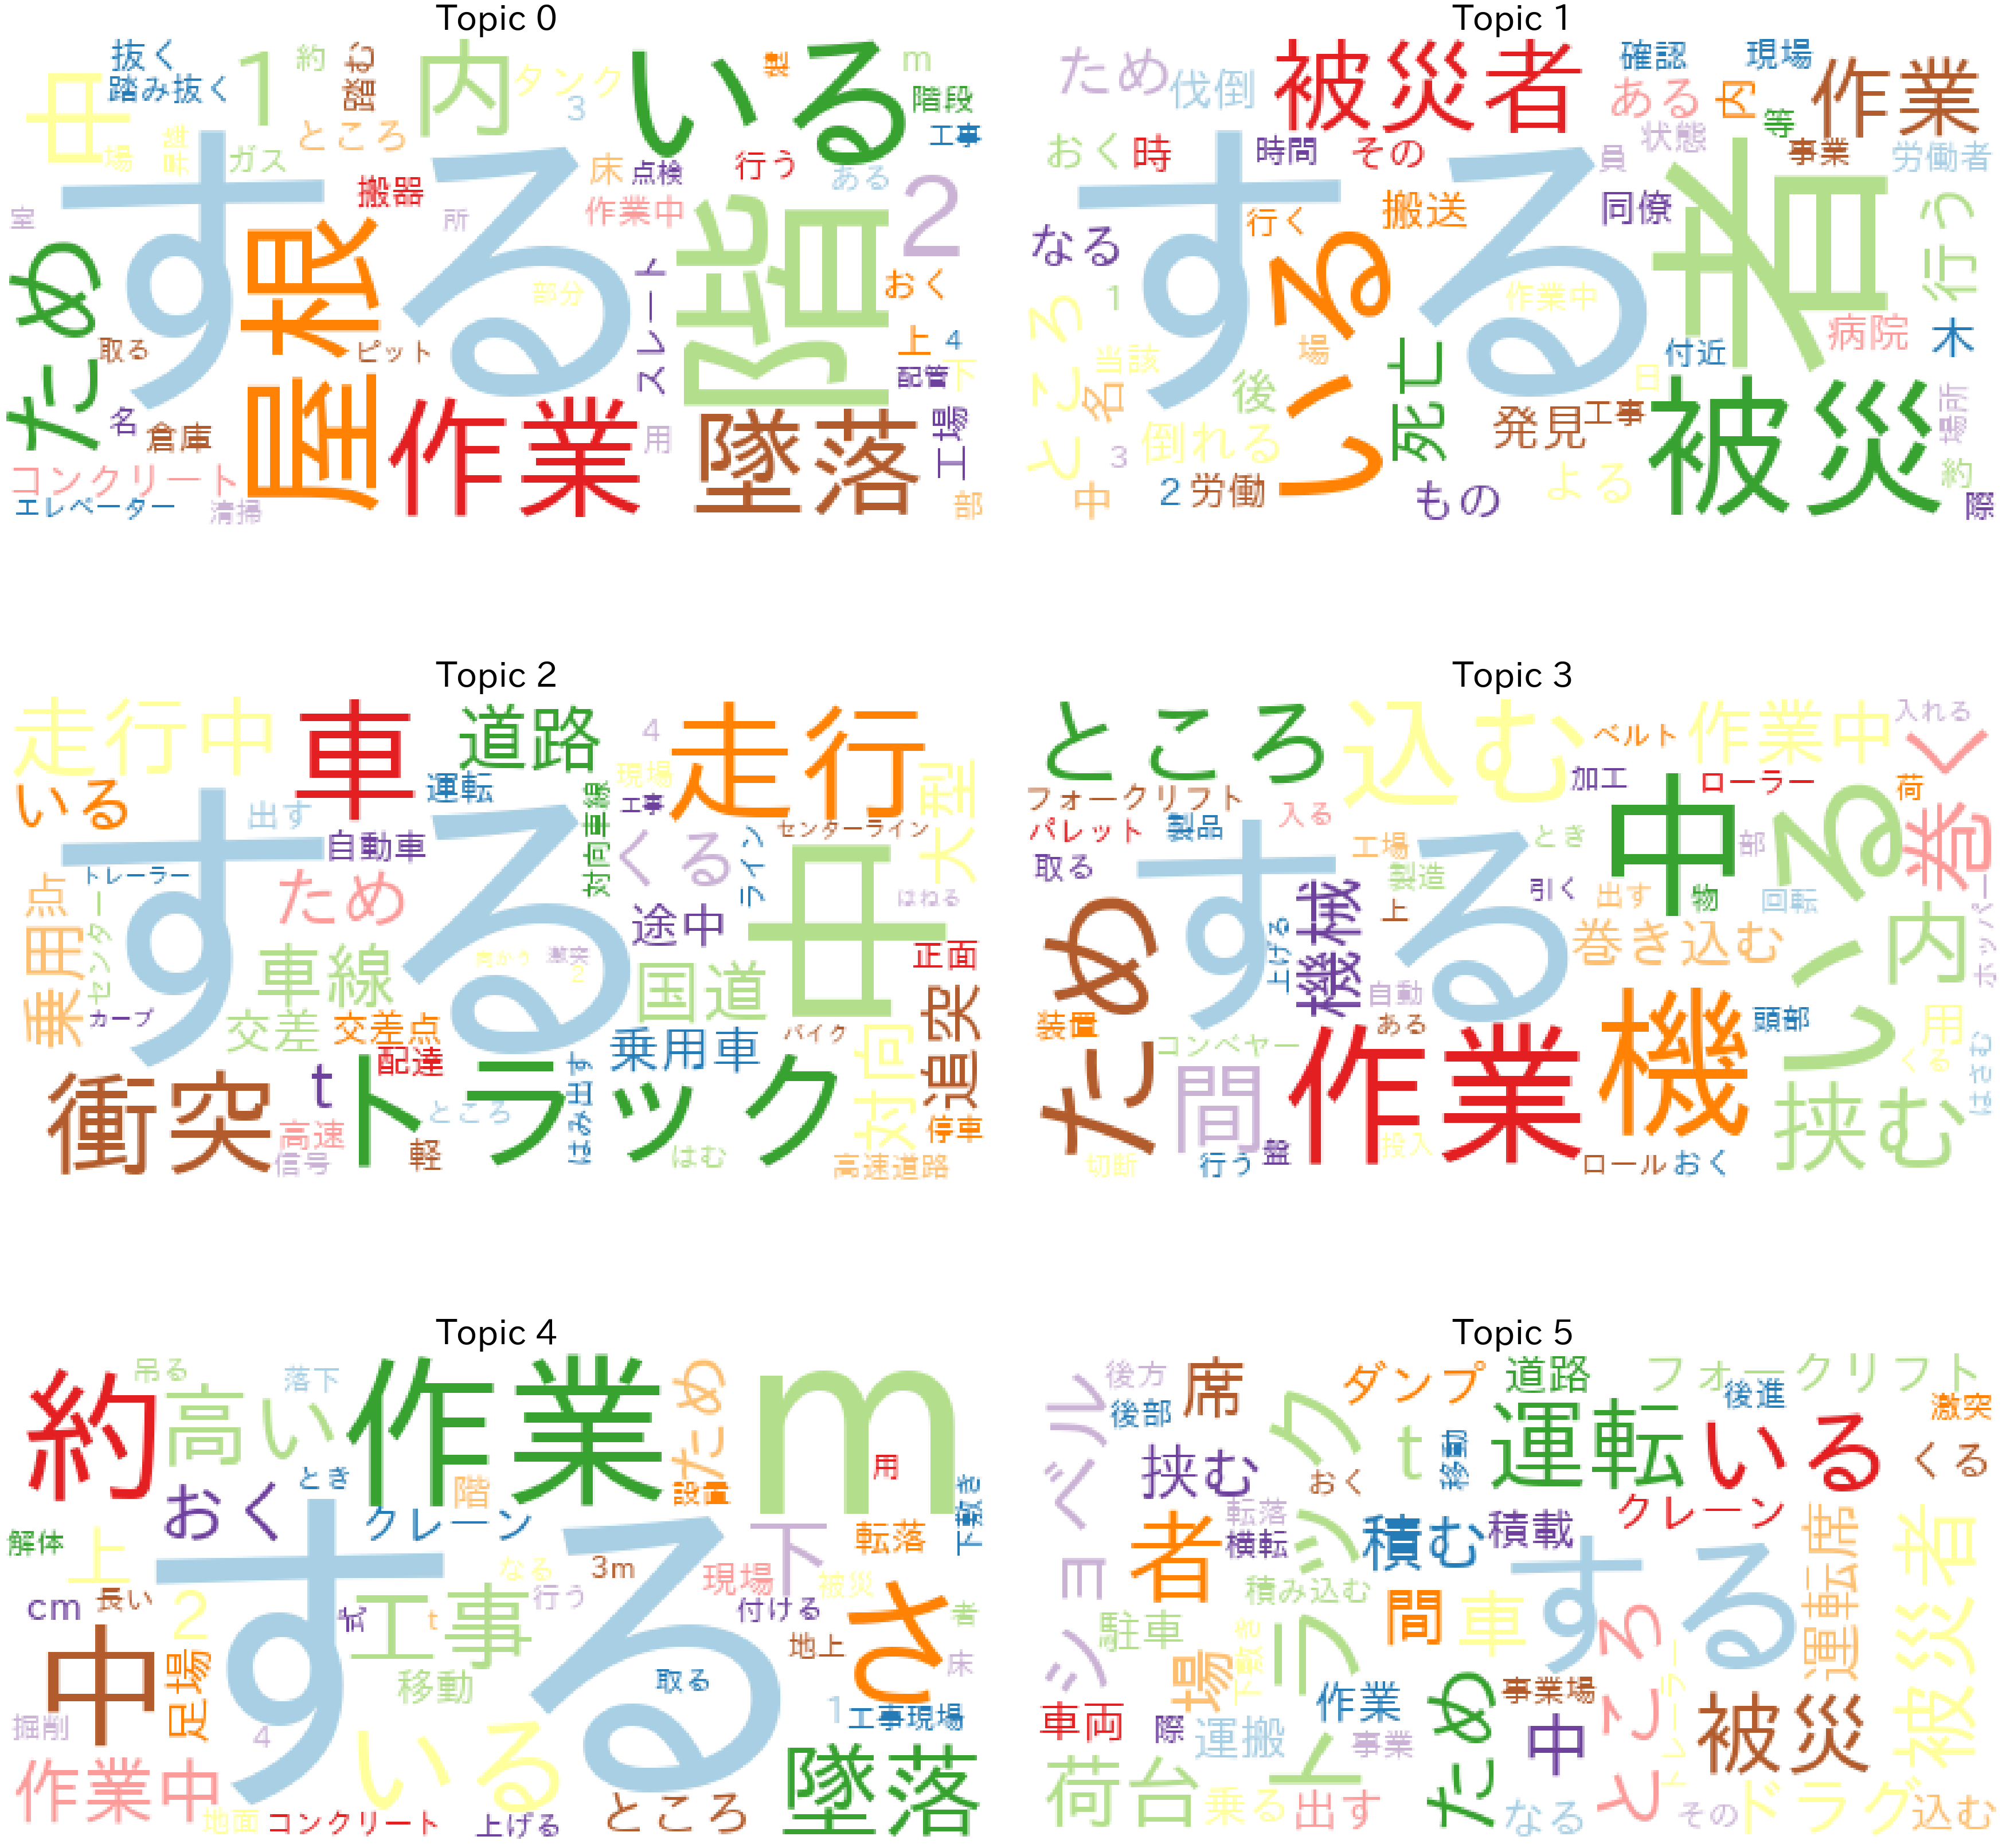

In [15]:
from wordcloud import WordCloud
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = "IPAexGothic"
plt.rcParams["font.size"] = 50

fig, axs = plt.subplots(ncols=2, nrows=int(lda_model.num_topics/2), figsize=(50,50))
axs = axs.flatten()

def color_func(word, font_size, position, orientation, random_state, font_path):
    return 'darkturquoise'

for i, t in enumerate(range(lda_model.num_topics)):

    x = dict(lda_model.show_topic(t, 50))
    im = WordCloud(
        font_path='/opt/anaconda3/envs/mhlw/lib/python3.6/site-packages/matplotlib/mpl-data/ipaexg.ttf',
        background_color='white',
        color_func=color_func,
        random_state=0
    ).generate_from_frequencies(x)
    axs[i].imshow(im.recolor(colormap= 'Paired_r' , random_state=244), alpha=0.98)
    axs[i].axis('off')
    axs[i].set_title('Topic '+str(t))
        
plt.tight_layout()
plt.show()

/opt/anaconda3/envs/mhlw/lib/python3.6/site-packages/matplotlib/mpl-data/matplotlibrc


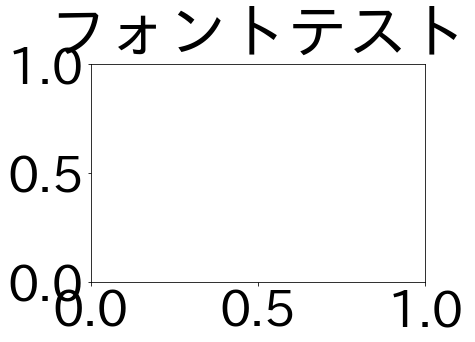

In [4]:
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import matplotlib as mpl

fonts = fm.findSystemFonts()

print(mpl.matplotlib_fname())

plt.rcParams['font.family'] = 'IPAexGothic'
plt.title('フォントテスト')
plt.show()